In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
with open('/media/vtarka/USB DISK/Lab/2P/Vid_217/corrcoefs.pkl', 'rb') as f:
        c = pickle.load(f)

In [6]:
c.shape

(163, 163)

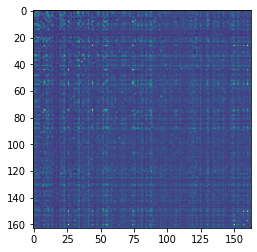

In [7]:
c[c>0.99] = 0
plt.imshow(c)
plt.show()

In [8]:
print(np.amax(c))
print(np.amin(c))

0.7365920475207914
-0.1576472029696522


In [9]:
print(len(c[np.where(c>0.2)]))

792


In [10]:
import networkx as nx
import sys
sys.path.append("../")
from src.utils import get_active_cells, get_best_frequency_by_peak, get_cell_x, get_cell_y

In [11]:
g = nx.Graph()

for cell_idx_i in range(len(c)):
    for cell_idx_j in range(len(c)):
        if c[cell_idx_i,cell_idx_j] > 0.2:
            g.add_edge(cell_idx_i,cell_idx_j)

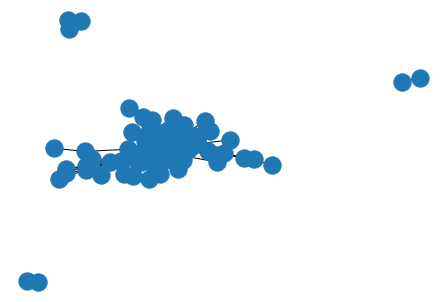

In [12]:
nx.draw(g)

In [13]:
edges = list(g.edges())
nodes = list(g.nodes())

In [14]:

cell_dictionary = "cells.pkl"

with open('/media/vtarka/USB DISK/Lab/2P/Vid_217/cells_ns.pkl', 'rb') as f:
        cell_dictionary = pickle.load(f)

# get only the active cells
active_cell_dict = get_active_cells(cell_dictionary)

In [15]:
def get_best_frequency(cell_tuning,freqs):
    median_across_itsies = np.median(cell_tuning, axis=1)
    max_response_idx = np.argmax(median_across_itsies)
    return freqs[max_response_idx]

In [17]:
color_map = []
active_cells = list(active_cell_dict.keys())
for node in nodes:
    color_map.append(get_best_frequency(active_cell_dict[active_cells[node]]['tuning_curve_peak'],[4.4,5.4,6.6,8.1,10,12,15,19,23,28,28,35,43]))

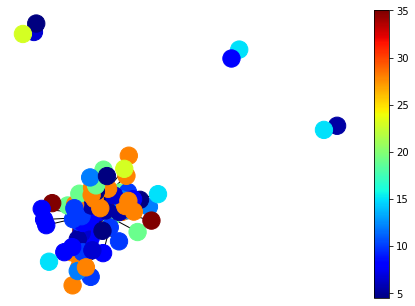

In [18]:
nx.draw(g,node_color=color_map,cmap = plt.cm.jet)
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(color_map), vmax=max(color_map)))
sm.set_array([])
cbar = plt.colorbar(sm)

In [19]:
h = nx.Graph()

for cell_idx_i in range(len(c)):
    for cell_idx_j in range(len(c)):
        if c[cell_idx_i,cell_idx_j] > 0.2:
            cell1_ID = active_cells[cell_idx_i]
            cell1_x = get_cell_x(active_cell_dict[cell1_ID])
            cell1_y = get_cell_y(active_cell_dict[cell1_ID])
            h.add_node(cell1_ID,pos = (cell1_x,cell1_y),color=get_best_frequency(active_cell_dict[active_cells[node]]['tuning_curve_peak'],[4.4,5.4,6.6,8.1,10,12,15,19,23,28,28,35,43]))

            cell2_ID = active_cells[cell_idx_j]
            cell2_x = get_cell_x(active_cell_dict[cell2_ID])
            cell2_y = get_cell_y(active_cell_dict[cell2_ID])
            h.add_node(cell2_ID,pos = (cell2_x,cell2_y),color=get_best_frequency_by_peak(active_cell_dict[active_cells[node]]['tuning_curve_peak'],[4.4,5.4,6.6,8.1,10,12,15,19,23,28,28,35,43]))

            h.add_edge(cell1_ID,cell2_ID)

IndexError: list index out of range

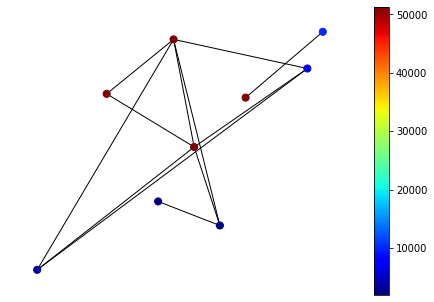

In [16]:
cmap = []
for node in h:
    cmap.append(get_best_frequency_by_peak(active_cell_dict[node]))

# nx.draw(h,pos=nx.get_node_attributes(h,'pos'),node_color=cmap, cmap = plt.cm.jet, node_size=50)
nx.draw(h,pos=nx.circular_layout(h),node_color=cmap, cmap = plt.cm.jet, node_size=50)
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(cmap), vmax=max(cmap)))
sm.set_array([])
cbar = plt.colorbar(sm)

In [20]:
nx.number_connected_components(h)

5